## Import libraries

In [3]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)

import pandas as pd 
import numpy as np
from utils import df_operations, NN_preprocessing

from importlib import reload
from IPython.display import display
from matplotlib import pyplot as plt


## Import Data

### Main Dataframe

In [4]:
masterdata = pd.read_stata('../data/MasterDataExtendStata12.dta')
original_shape = masterdata.shape
data = pd.read_csv('../data/final_data.csv',parse_dates=['dtcol']) #dataset with locations


### Other dataframes

In [3]:

"""
malha400 = pd.read_csv('./data/malha400.csv', sep=';',decimal=',')
malha400completa = pd.read_csv('./data/malha400Completa.csv', sep=';',decimal=',')
malha400completa2 = pd.read_csv('./data/malha400Completa2.csv', sep=';',decimal=',')
masterdata = pd.read_csv('./data/masterData.csv', sep=';',decimal='.') #attention to the decimal separator

cols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', 
        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',
        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',
        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',
        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']

banco_160724 = pd.read_csv('./data/banco_160724.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.
banco_160724.columns = cols


IdQdnte = pd.read_excel('./data/IdQdnte400.xls')
active_traps = pd.read_excel('./data/OVITRAMPAS_ATIVAS.xlsx')

cols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', 
        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',
        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',
        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',
        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']

banco_160724 = pd.read_csv('./data/banco_160724.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.
banco_160724.columns = cols

"""


"\nmalha400 = pd.read_csv('./data/malha400.csv', sep=';',decimal=',')\nmalha400completa = pd.read_csv('./data/malha400Completa.csv', sep=';',decimal=',')\nmalha400completa2 = pd.read_csv('./data/malha400Completa2.csv', sep=';',decimal=',')\nmasterdata = pd.read_csv('./data/masterData.csv', sep=';',decimal='.') #attention to the decimal separator\n\ncols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', \n        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',\n        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',\n        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',\n        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']\n\nbanco_160724 = pd.read

In [6]:
masterdata.columns

Index(['exercicio', 'nplaca', 'narmad', 'idarmad', 'endarmad', 'cep',
       'dtinstal', 'dtcol', 'semepi', 'cdabrange', 'abrange', 'quadra',
       'cdbairro', 'nombairro', 'cddist', 'novos', 'eclod', 'desid', 'CatRC',
       'qarmadila', 'qarmadild', 'qarmadilrc', 'qarmadilbh', 'dia', 'mes',
       'ano', 'intvinstcol', 'agintincol', 'ovos', 'bovos', 'agnovos',
       'nagnovos', 'ovosdiacol', 'catovos', 'agovosdiacol', 'nagovosdiacol',
       'anoepid', 'nanoepid', 'mesepid', 'season', 'lustro', 'quinzena',
       'quinzepid', 'Calustro', 'distrito', 'npesmes', 'npesano', 'npesanoepi',
       'quadaa', 'quadist', 'quadaadist', 'aadist', 'qaabh', 'qaadist',
       'qaaCatRC', 'qquadbh', 'qquadist', 'qquadaa', 'qquaCatRC', 'peso1',
       'peso2', 'coordx', 'coordy', 'qdnte', 'ninsp', 'scoreG', 'GerCat',
       'Peso1', 'Peso2', 'SumOvosP1', 'SumOvosP2'],
      dtype='object')

## Exploration

### Number of unique values in each column

In [ ]:
unique_values = df_operations.info_dict_col(masterdata,masterdata.columns,df_operations.get_col_unique_values)
df_operations.print_info_col(unique_values,6)

exercicio [14]: [2018 2014 2023 2013 2015 2020]
nplaca [523048]: [90000140 90000215 90000156 90000012 90000272 90000184]
narmad [2066]: [901001 901002 901003 901004 901005 901006]
idarmad [2066]: [901374 901375 901376 901377 901378 901379]
endarmad [2066]: [97222 97559 97541 97149 96964 96965]
cep [1786]: [9.03069076e+09 9.03069224e+09 9.03069008e+09 9.03069075e+09
 9.03069072e+09 9.03069080e+09]
dtinstal [2696]: <DatetimeArray>
['2018-06-18 00:00:00', '2014-09-22 00:00:00', '2023-05-29 00:00:00',
 '2013-07-01 00:00:00', '2015-03-30 00:00:00', '2020-08-10 00:00:00']
Length: 6, dtype: datetime64[ns]
dtcol [2803]: <DatetimeArray>
['2018-06-25 00:00:00', '2014-09-29 00:00:00', '2023-06-05 00:00:00',
 '2013-07-08 00:00:00', '2015-04-06 00:00:00', '2020-08-17 00:00:00']
Length: 6, dtype: datetime64[ns]
semepi [50]: [125 139 122 127 113 133]
cdabrange [155]: [901460. 901400. 901300. 901260. 901250. 901290.]
abrange [154]: ['C.S.REGINA' 'C.S.LINDEIA' 'C.S.ITAIPU' 'C.S.TUNEL DE IBIRITE'
 'C.S.

In [ ]:
weird_unique_values = {col:values for col,values in unique_values.items() if values.shape[0] < 10}
df_operations.print_info_col(weird_unique_values,20)

cddist [9]: [1 2 3 4 5 6 7 8 9]
eclod [6]: [nan  1.  2.  4.  3.  5.]
desid [6]: [nan  1.  5.  3.  4.  2.]
CatRC [5]: [ 2.  3.  1. nan  0.]
qarmadild [9]: [245. 217. 208. 224. 285. 178. 215. 301. 193.]
qarmadilrc [5]: [1053.  161.  766.   23.   64.]
qarmadilbh [1]: [2067.]
agintincol [4]: ['06 - 08' '01 - 05' '09 - 99' '']
ovos [3]: ['Neg' 'Pos' '']
bovos [3]: [ 0.  1. nan]
agnovos [6]: ['0000 - 0000' '0101 - 9999' '0051 - 0100' '0016 - 0050' '0001 - 0015' '']
nagnovos [6]: [ 0.  4.  3.  2.  1. nan]
catovos [3]: [ 0.  1. nan]
agovosdiacol [6]: ['000.00 - 000.00' '007.00 - 017.99' '002.00 - 006.99' ''
 '018.00 - 999.99' '000.01 - 001.99']
nagovosdiacol [6]: [ 0.  3.  2. nan  4.  1.]
season [2]: [1. 2.]
distrito [9]: ['BARREIRO' 'CENTRO-SUL' 'LESTE' 'NORDESTE' 'NOROESTE' 'NORTE' 'OESTE'
 'PAMPULHA' 'VENDA NOVA']
npesmes [3]: [2 3 1]
qaabh [1]: [154.]
qaadist [7]: [20. 12. 14. 21. 17. 18. 15.]
qaaCatRC [5]: [84. 20. 47.  3.  2.]
qquadbh [2]: [1802.   nan]
qquadist [9]: [224. 201. 189. 212.

### Sorting data columns

In [ ]:
masterdata['dtinstal'].sort_values()

403650   2011-09-12
395514   2011-09-13
414143   2011-09-13
402549   2011-09-13
405603   2011-09-13
            ...    
418138   2024-08-23
412013   2024-08-23
338308   2024-08-23
418453   2024-08-23
469756   2024-08-23
Name: dtinstal, Length: 523048, dtype: datetime64[ns]

### Checking types

In [ ]:
# dict containing the types of each column
col_types = df_operations.info_dict_col(masterdata, masterdata.columns, df_operations.get_col_types)
df_operations.print_info_col(col_types,20)

exercicio [1]: [<class 'int'>]
nplaca [1]: [<class 'int'>]
narmad [1]: [<class 'int'>]
idarmad [1]: [<class 'int'>]
endarmad [1]: [<class 'int'>]
cep [1]: [<class 'float'>]
dtinstal [1]: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
dtcol [1]: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
semepi [1]: [<class 'int'>]
cdabrange [1]: [<class 'float'>]
abrange [1]: [<class 'str'>]
quadra [1]: [<class 'float'>]
cdbairro [1]: [<class 'float'>]
nombairro [1]: [<class 'str'>]
cddist [1]: [<class 'int'>]
novos [1]: [<class 'float'>]
eclod [1]: [<class 'float'>]
desid [1]: [<class 'float'>]
CatRC [1]: [<class 'float'>]
qarmadila [1]: [<class 'float'>]
qarmadild [1]: [<class 'float'>]
qarmadilrc [1]: [<class 'float'>]
qarmadilbh [1]: [<class 'float'>]
dia [1]: [<class 'float'>]
mes [1]: [<class 'float'>]
ano [1]: [<class 'float'>]
intvinstcol [1]: [<class 'float'>]
agintincol [1]: [<class 'str'>]
ovos [1]: [<class 'str'>]
bovos [1]: [<class 'float'>]
agnovos [1]: [<class 'str'>]
nag

In [ ]:
# dict containing the columns with more than one type
weird_type_cols = {key:value for key,value in col_types.items() if value.shape[0] > 1}
print('Columns with more than one type:')
df_operations.print_info_col(weird_type_cols,20)


print('\n Values of columns with more than one type:')
for col, value in weird_type_cols.items():
    print(f'{col} [{value.shape[0]}]: {masterdata[col].unique()[:20]}')

Columns with more than one type:

 Values of columns with more than one type:


## Relevant information of Traps

### Number of samples

In [6]:
data.shape[0]
print('Total number of samples: ', data.shape[0])

Total number of samples:  517799


### Time difference between samples

Number of samples with certain time difference between the previous one:


,time_diff,count
0,14 days,378236.0
1,28 days,35163.0
2,13 days,32069.0
3,15 days,32059.0
4,12 days,7221.0
5,16 days,7030.0
6,42 days,4491.0
7,35 days,3028.0
8,17 days,2530.0
9,29 days,2486.0


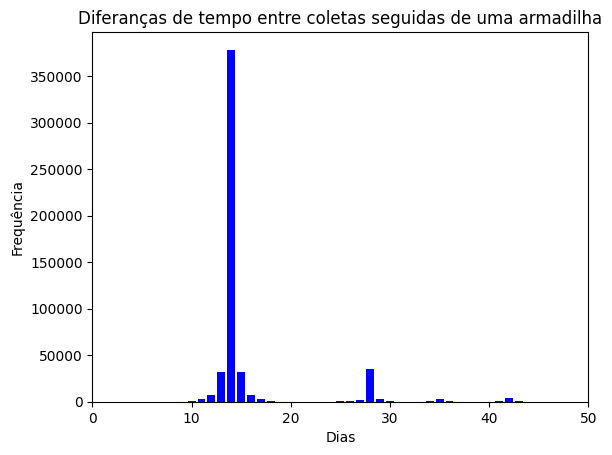

In [8]:
counter = 0
for trap in data['narmad'].unique():
    sorted_vector = data[data['narmad'] == trap]['dtcol'].sort_values().reset_index(drop=True) #sort values
    armad_counter = sorted_vector.diff().value_counts()
    counter = armad_counter.add(counter,fill_value=0)

print('Number of samples with certain time difference between the previous one:',)
display(pd.DataFrame(counter.sort_values(ascending=False)[:20].reset_index()).rename(columns={'dtcol':'time_diff'}))

# Plotting the time differences
plt.bar(x =  counter.index.days, height=counter.values,color='blue')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.title('Diferanças de tempo entre coletas seguidas de uma armadilha')
plt.xlim(0, 50)
plt.show()

### Difference between installation and collections

In [22]:
dt_camp = data['dtcol'] - pd.to_datetime(data['dtinstal']) # time difference between the installation and the collection
dt_camp = dt_camp.dt.days
print(dt_camp.value_counts().sort_index(),'\n')

print('Percentage of samples with time difference between the installation and the collection equals to seven:', dt_camp[dt_camp == 7].shape[0]/data.shape[0])

0           23
1            2
2           12
3            4
4          221
5         1272
6         8587
7       491389
8        12553
9         2222
10         551
11         271
12         127
13         108
14         184
15          35
16          16
17          20
18           2
19           7
20          22
21          66
22          15
23           6
24           1
25           1
26           4
27           3
28           9
29           3
30           2
34           2
35           7
36           7
37          11
39           1
40           1
41           3
42           3
44           1
45           2
47           2
49           2
50           1
51           2
56           1
61           2
62           2
63           1
69           1
79           1
83           2
89           1
133          1
136          1
137          1
371          1
3296         1
Name: count, dtype: int64 

Percentage of samples with time difference between the installation and the collection equals to seven

### Number of traps

In [11]:
ntraps = data['narmad'].unique().shape[0]
print(f'Number of traps: {ntraps}')

Number of traps: 2008


### Number of plates

In [12]:
nplates = data['nplaca'].unique().shape[0]
print(f'Number of plates: {nplates}')

Number of plates: 517799


### Traps by year

,anoepid,count
12,2011_12,13889
11,2012_13,38166
10,2013_14,39457
9,2014_15,40120
4,2015_16,42047
8,2016_17,40713
6,2017_18,40935
5,2018_19,41486
7,2019_20,40850
3,2020_21,42152


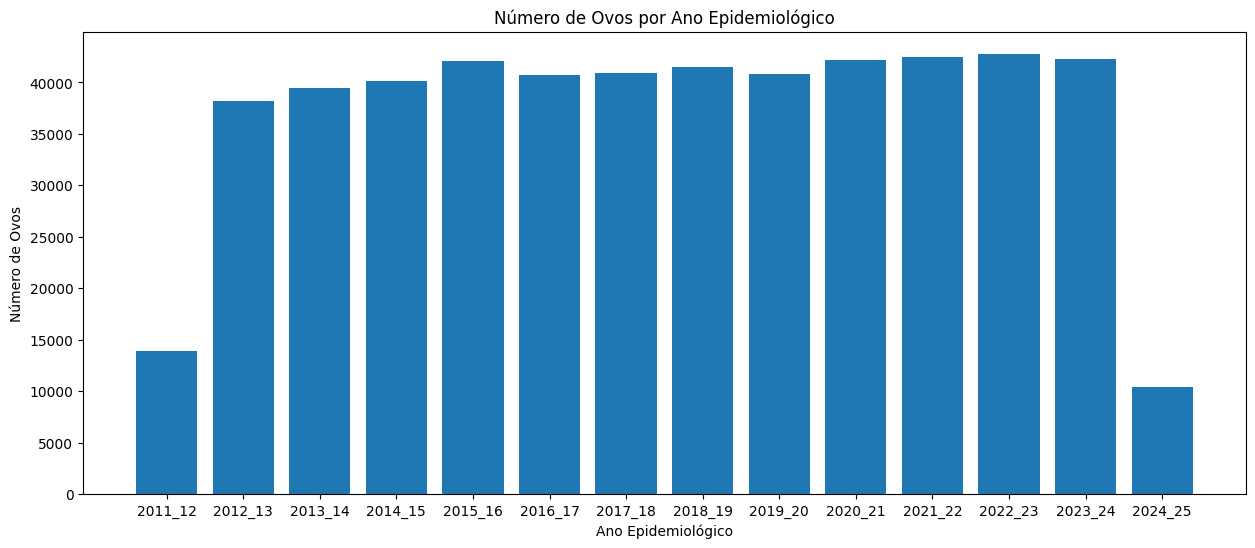

In [14]:
trap_by_year = data['anoepid'].value_counts().reset_index().sort_values('anoepid')
display(trap_by_year)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_year['anoepid'], trap_by_year['count'])
plt.xlabel('Ano Epidemiológico')
plt.ylabel('Número de Armadilhas')
plt.title('Número de Armadilhas por Ano Epidemiológico')
plt.show()

### Traps by category

,GerCat,count,min,max,mean
3,A1,26758,0.0,2417.0,95.937813
0,A2,315305,0.0,4227.0,42.481055
2,B,70881,0.0,2054.0,8.977145
1,M,104855,0.0,1278.0,19.860836


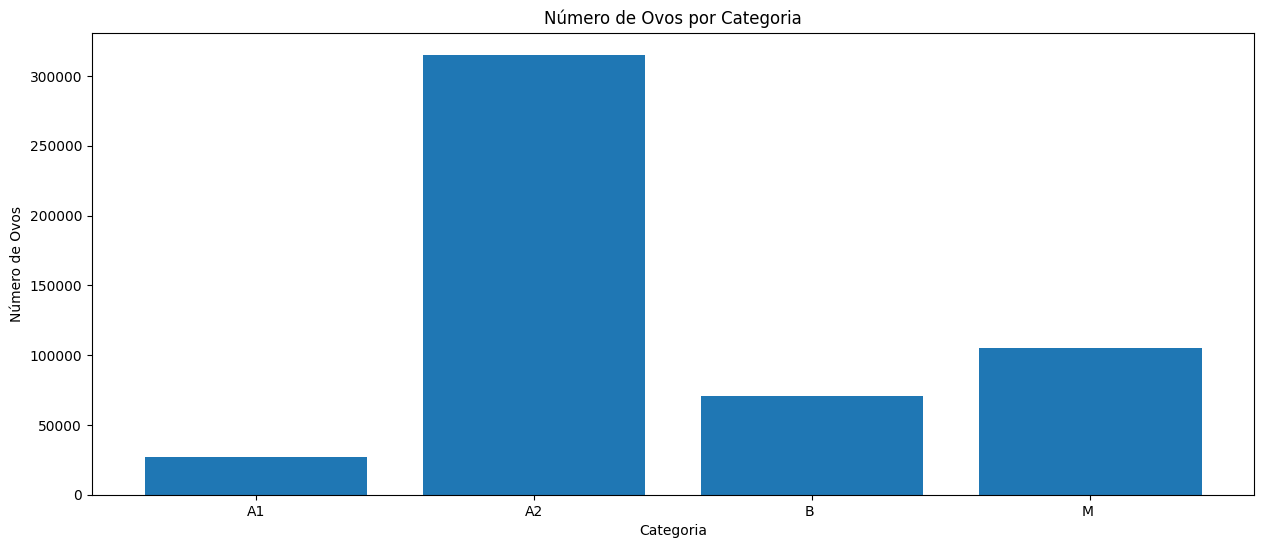

In [15]:
trap_by_cat = data['GerCat'].value_counts().reset_index().sort_values('GerCat')
trap_by_cat['min']  = [min(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']] 
trap_by_cat['max']   = [max(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']]
trap_by_cat['mean']  = [data[data['GerCat']==cat]['novos'].mean() for cat in trap_by_cat['GerCat']]



display(trap_by_cat)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_cat['GerCat'], trap_by_cat['count'])
plt.xlabel('Categoria')
plt.ylabel('Número de Armadilhas')
plt.title('Número de Armadilhas por Categoria')
plt.show()

### Traps by region

,distrito,count
2,BARREIRO,63077
3,CENTRO-SUL,61829
7,LESTE,50862
4,NORDESTE,59096
1,NOROESTE,64465
8,NORTE,40117
6,OESTE,51752
0,PAMPULHA,74233
5,VENDA NOVA,52368


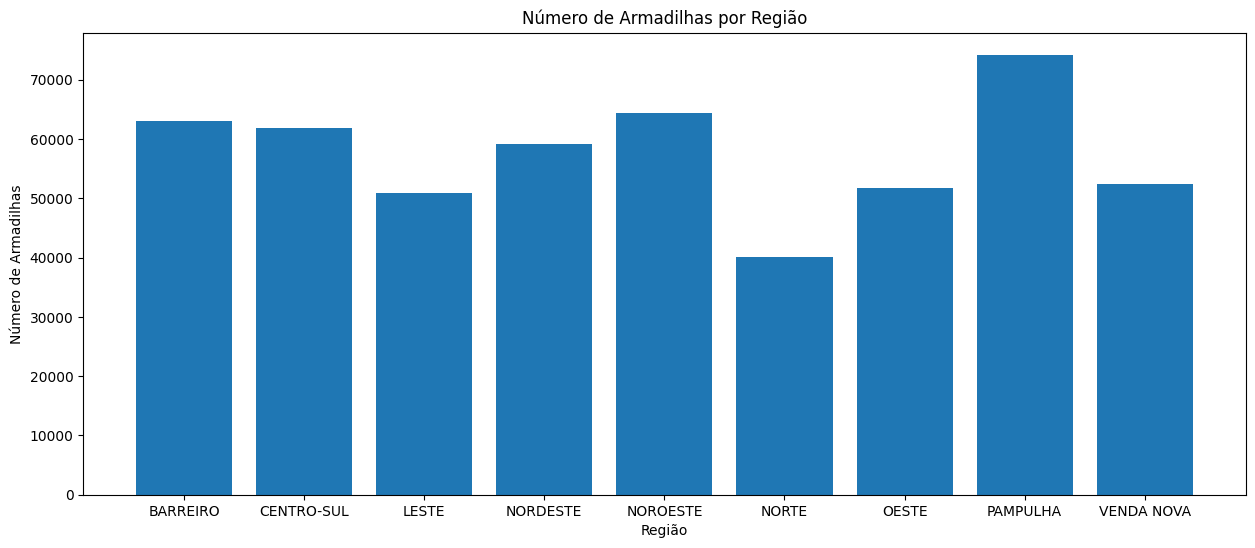

In [16]:
trap_by_reg = data['distrito'].value_counts().reset_index().sort_values('distrito')


display(trap_by_reg)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_reg['distrito'], trap_by_reg['count'])
plt.xlabel('Região')
plt.ylabel('Número de Armadilhas')
plt.title('Número de Armadilhas por Região')
plt.show()

## Relevant information of eggs

### General eggs information

In [ ]:
data['novos'].describe()

count    517799.000000
mean         36.076566
std          74.214830
min           0.000000
25%           0.000000
50%           0.000000
75%          45.000000
max        4227.000000
Name: novos, dtype: float64

### Percentage of zeros

In [ ]:
percentage = (data['novos'] == 0).sum()/len(data['novos'])*100
print(f'Percentage of 0 values: {percentage:.2f}%')

Percentage of 0 values: 52.01%


### Percentage of zeros by category

In [ ]:
for cat in [ 'A1','A2', 'M ' ,'B ']:
    cat_data = df_operations.row_with_value(data, 'GerCat',cat)
    print(f'Percentage of {cat} values: {(cat_data["novos"] == 0).sum()/len(cat_data["novos"])*100:.2f}%')

Percentage of A2 values: 45.26%
Percentage of A1 values: 25.02%
Percentage of M  values: 62.58%
Percentage of B  values: 76.62%


### Eggs count by category

#### Sum

GerCat
A1     2567104.0
A2    13394489.0
B       636309.0
M      2082508.0
Name: novos, dtype: float64

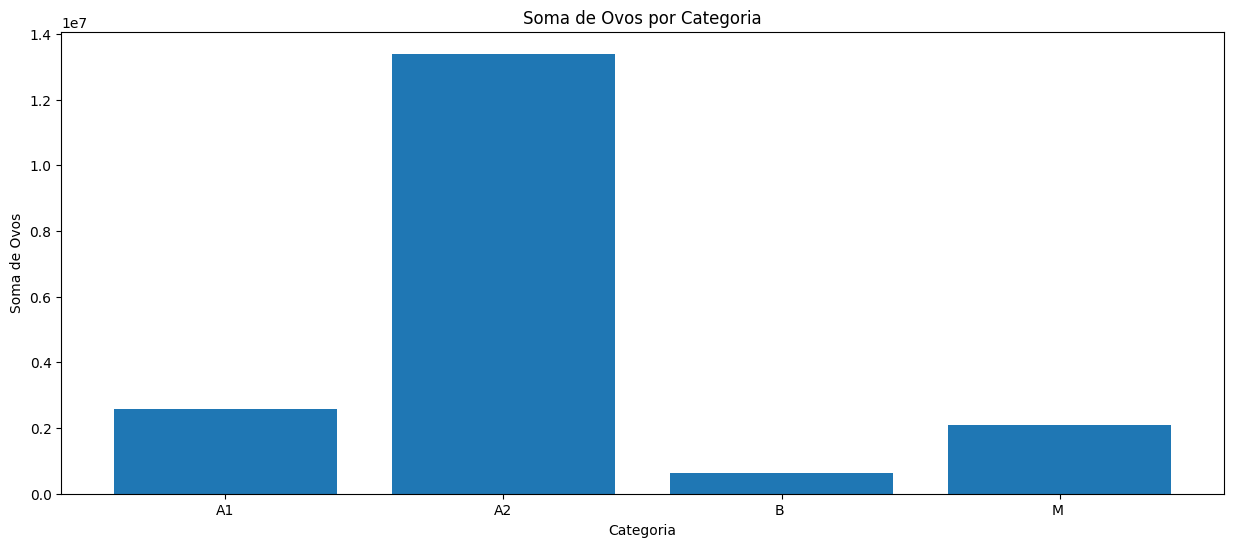

In [59]:
eggs_by_cat_sum =  data[['novos','GerCat']].groupby('GerCat').sum()['novos']

display(eggs_by_cat_sum)

plt.figure(figsize=(15, 6))
plt.bar(eggs_by_cat_sum.index, eggs_by_cat_sum.values)
plt.xlabel('Categoria')
plt.ylabel('Soma de Ovos')
plt.title('Soma de Ovos por Categoria')
plt.show()

#### Mean

GerCat
A1    95.937813
A2    42.481055
B      8.977145
M     19.860836
Name: novos, dtype: float64

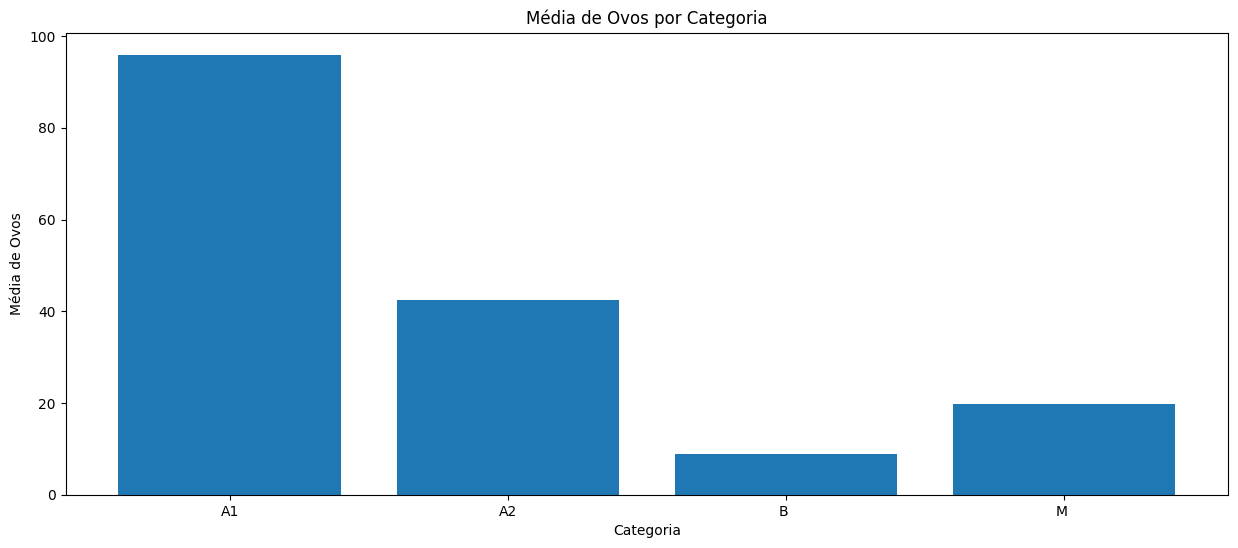

In [60]:
eggs_by_cat_mean =  data[['novos','GerCat']].groupby('GerCat').mean()['novos']

display(eggs_by_cat_mean)

plt.figure(figsize=(15, 6))
plt.bar(eggs_by_cat_mean.index, eggs_by_cat_mean.values)
plt.xlabel('Categoria')
plt.ylabel('Média de Ovos')
plt.title('Média de Ovos por Categoria')
plt.show()

### Eggs count by region

#### Sum

distrito
BARREIRO      1759859.0
CENTRO-SUL    1197295.0
LESTE         1769947.0
NORDESTE      2352480.0
NOROESTE      2502519.0
NORTE         1777691.0
OESTE         1921283.0
PAMPULHA      3325887.0
VENDA NOVA    2073449.0
Name: novos, dtype: float64

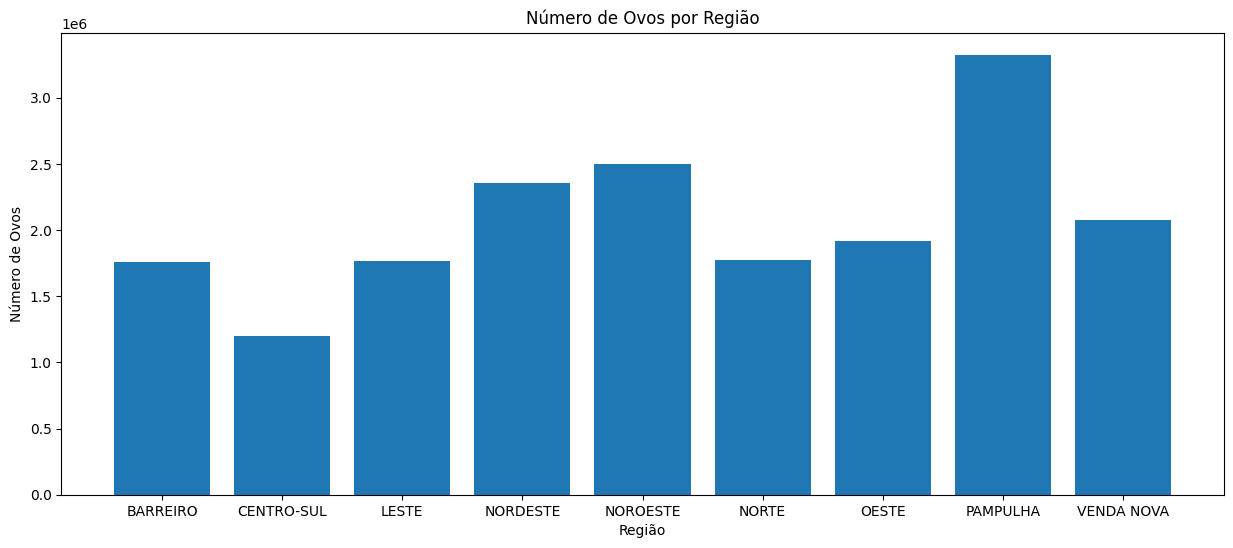

In [51]:
eggs_by_region_sum =  data[['novos','distrito']].groupby('distrito').sum()['novos']

display(eggs_by_region_sum)

plt.figure(figsize=(15, 6))
plt.bar(eggs_by_region_sum.index, eggs_by_region_sum.values)
plt.xlabel('Região')
plt.ylabel('Soma de Ovos')
plt.title('Soma de Ovos por Região')
plt.show()

#### Mean

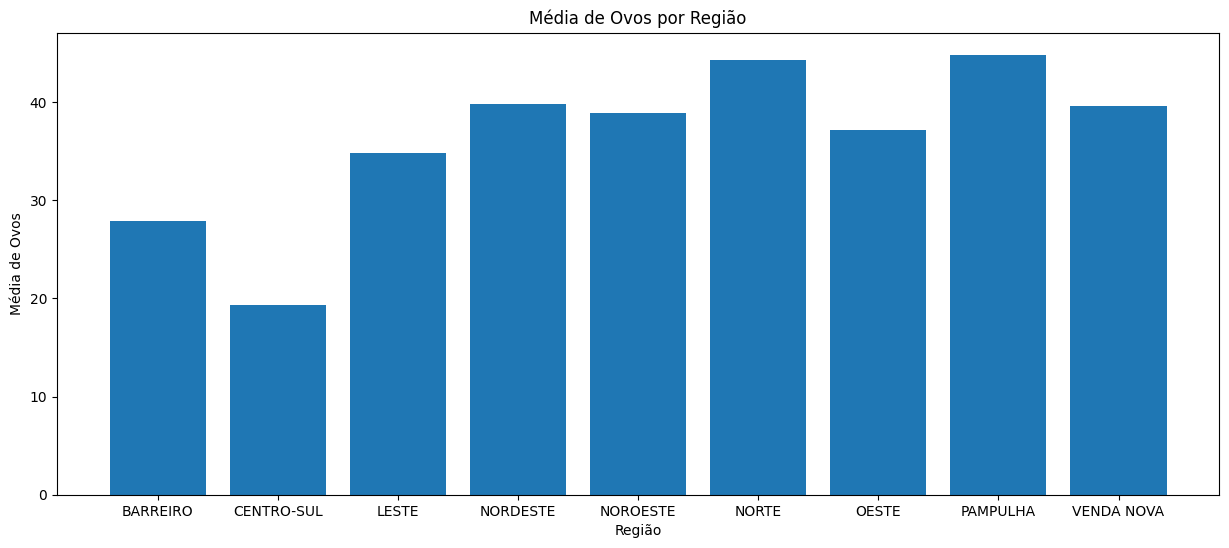

distrito
BARREIRO      27.900170
CENTRO-SUL    19.364619
LESTE         34.799005
NORDESTE      39.807770
NOROESTE      38.819809
NORTE         44.312660
OESTE         37.124807
PAMPULHA      44.803349
VENDA NOVA    39.593817
Name: novos, dtype: float64

In [63]:
eggs_by_region_mean =  data[['novos','distrito']].groupby('distrito').mean()['novos']


plt.figure(figsize=(15, 6))
plt.bar(eggs_by_region_mean.index, eggs_by_region_mean.values)
plt.xlabel('Região')
plt.ylabel('Média de Ovos')
plt.title('Média de Ovos por Região')
plt.show()

display(eggs_by_region_mean)


### Eggs count by year

#### Sum

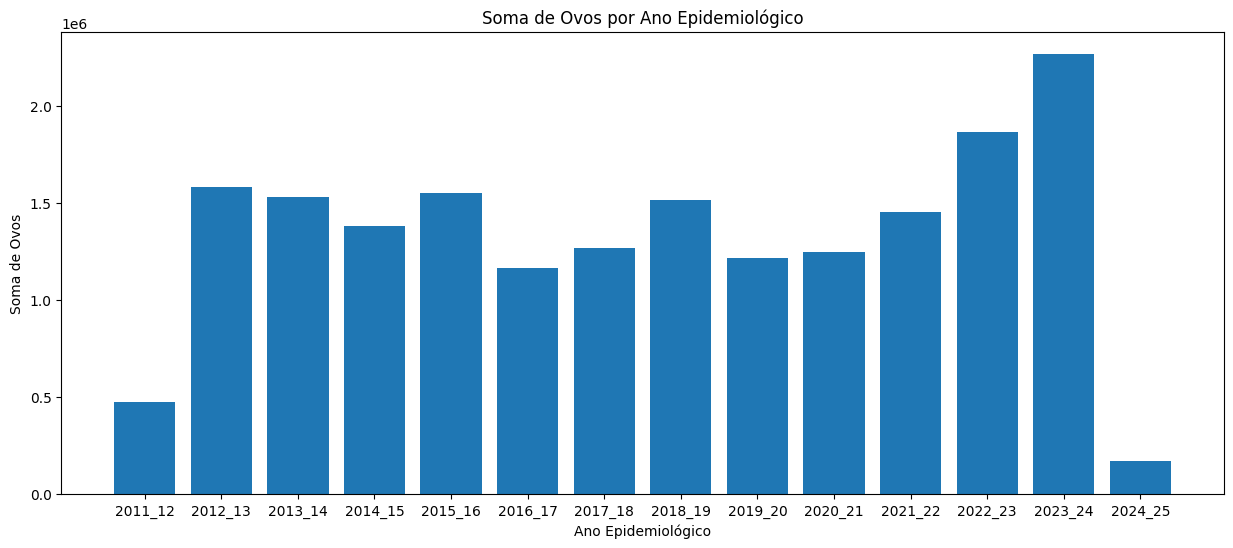

anoepid
2011_12     472606.0
2012_13    1580323.0
2013_14    1529363.0
2014_15    1382810.0
2015_16    1553139.0
2016_17    1163696.0
2017_18    1268888.0
2018_19    1512791.0
2019_20    1216699.0
2020_21    1248712.0
2021_22    1451319.0
2022_23    1863467.0
2023_24    2265147.0
2024_25     171450.0
Name: novos, dtype: float64

In [64]:
eggs_by_year_sum =  data[['novos','anoepid']].groupby('anoepid').sum()['novos']


plt.figure(figsize=(15, 6))
plt.bar(eggs_by_year_sum.index, eggs_by_year_sum.values)
plt.xlabel('Ano Epidemiológico')
plt.ylabel('Soma de Ovos')
plt.title('Soma de Ovos por Ano Epidemiológico')
plt.show()

display(eggs_by_year_sum)


#### Mean

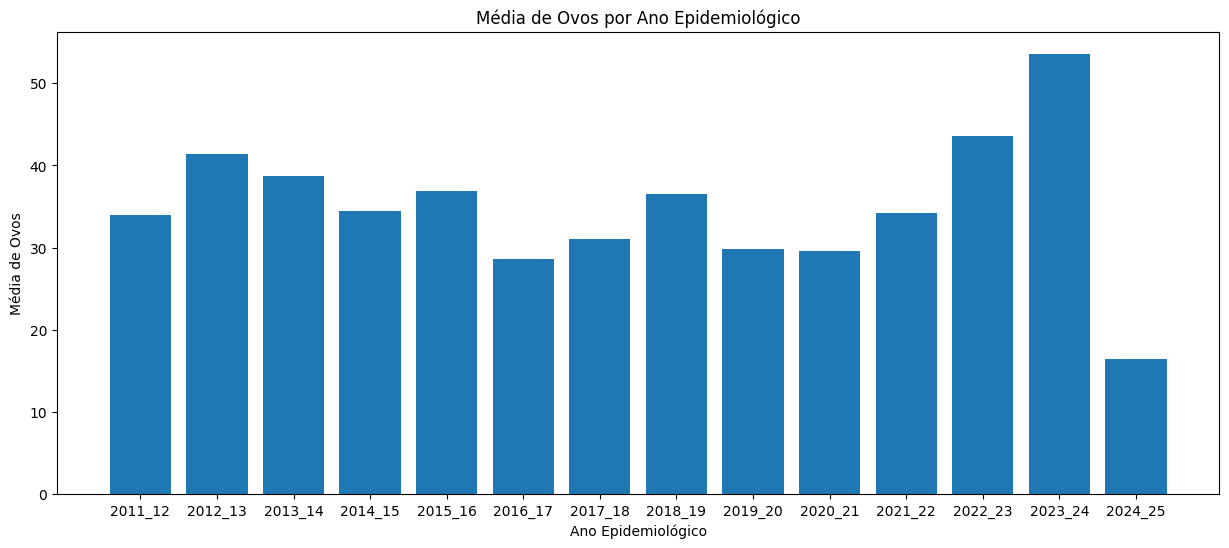

anoepid
2011_12    34.027360
2012_13    41.406566
2013_14    38.760245
2014_15    34.466849
2015_16    36.938164
2016_17    28.582910
2017_18    30.997630
2018_19    36.465097
2019_20    29.784553
2020_21    29.624027
2021_22    34.173609
2022_23    43.601090
2023_24    53.528062
2024_25    16.392581
Name: novos, dtype: float64

In [62]:
eggs_by_year_mean =  data[['novos','anoepid']].groupby('anoepid').mean()['novos']


plt.figure(figsize=(15, 6))
plt.bar(eggs_by_year_mean.index, eggs_by_year_mean.values)
plt.xlabel('Ano Epidemiológico')
plt.ylabel('Média de Ovos')
plt.title('Média de Ovos por Ano Epidemiológico')
plt.show()

display(eggs_by_year_mean)


### Eggs count by month

#### Sum

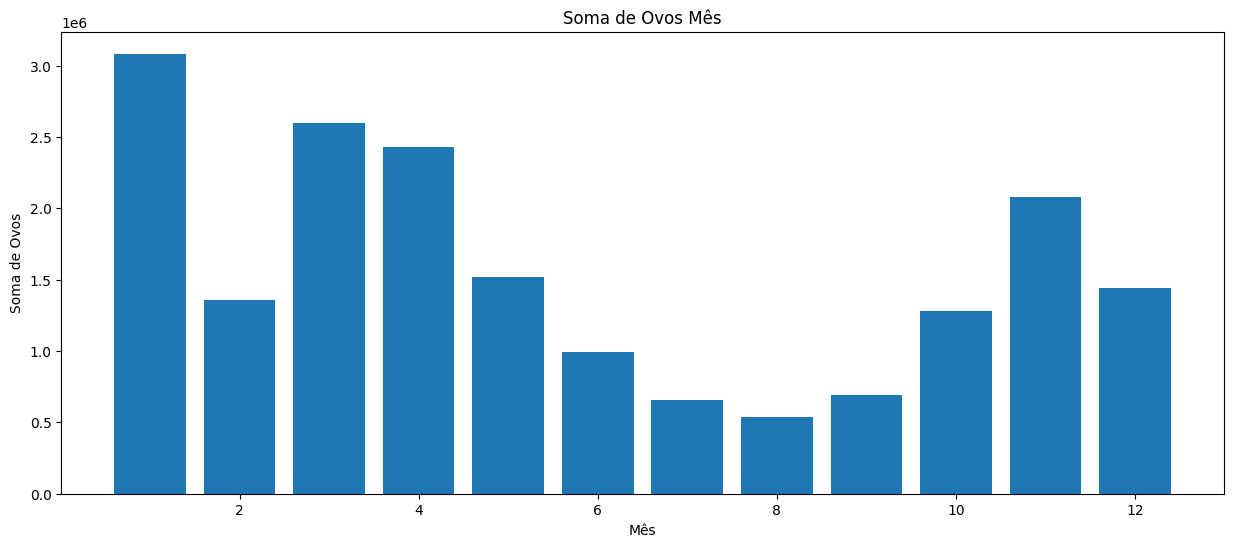

mes
1.0     3083484.0
2.0     1359686.0
3.0     2597914.0
4.0     2431190.0
5.0     1520075.0
6.0      995742.0
7.0      659417.0
8.0      538740.0
9.0      688680.0
10.0    1283779.0
11.0    2076590.0
12.0    1445113.0
Name: novos, dtype: float64

In [12]:
eggs_by_month_sum =  data[['novos','mes']].groupby('mes').sum()['novos']


plt.figure(figsize=(15, 6))
plt.bar(eggs_by_month_sum.index, eggs_by_month_sum.values)
plt.xlabel('Mês')
plt.ylabel('Soma de Ovos')
plt.title('Soma de Ovos Mês')
plt.show()

display(eggs_by_month_sum)


#### Mean

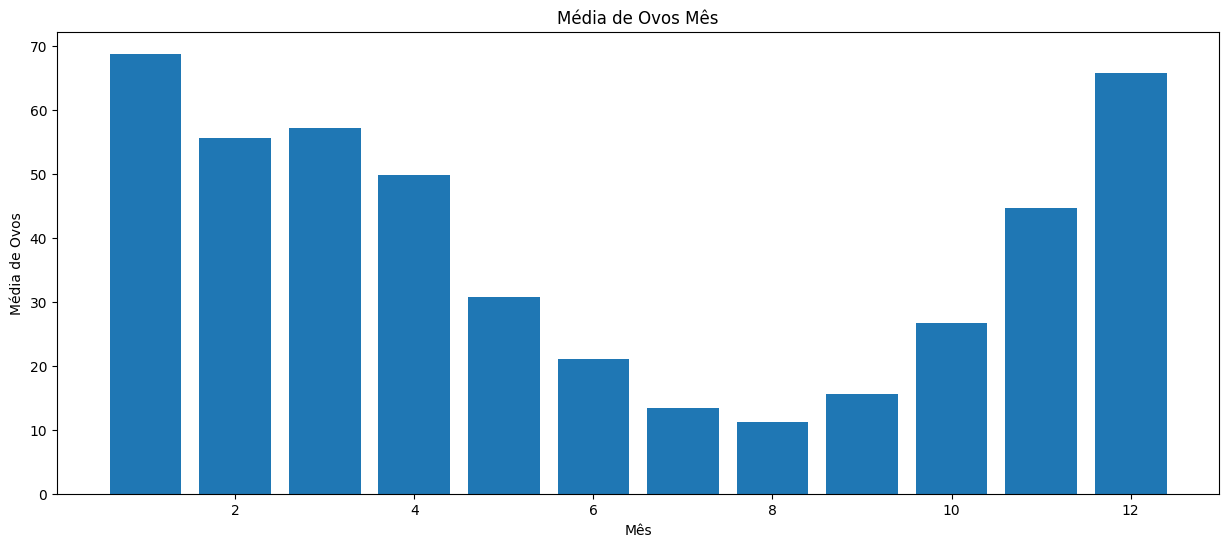

mes
1.0     68.804731
2.0     55.690600
3.0     57.159824
4.0     49.870564
5.0     30.696183
6.0     21.102935
7.0     13.471511
8.0     11.177874
9.0     15.662141
10.0    26.697563
11.0    44.660731
12.0    65.794618
Name: novos, dtype: float64

In [6]:
eggs_by_month_mean =  data[['novos','mes']].groupby('mes').mean()['novos']


plt.figure(figsize=(15, 6))
plt.bar(eggs_by_month_mean.index, eggs_by_month_mean.values)
plt.xlabel('Mês')
plt.ylabel('Média de Ovos')
plt.title('Média de Ovos Mês')
plt.show()

display(eggs_by_month_mean)


## Processing

### Remove useless columns 

In [22]:
remove_cols = []
for col,value in unique_values.items():
     sum_dropped = 0 
     if value.shape[0] == 1:
        masterdata.drop(col, axis=1, inplace=True)
        remove_cols.append(col)
        sum_dropped += 1
for col in remove_cols:
    del unique_values[col]
    del col_types[col]

print(f'{original_shape[1] - masterdata.shape[1]} columns with only one value were dropped.')
# IND_OFICIAL char(1),[Indicativo se o endereço é oficial ou informado.]

3 columns with only one value were dropped.


### NaN Treatment

In [23]:
masterdata.isna().sum().sort_values(ascending=False)[:30]

eclod            480908
desid            456084
nagovosdiacol     10237
CatRC              6546
SumOvosP1          5290
Peso2              5290
Peso1              5290
SumOvosP2          5290
nagnovos           5249
ovosdiacol         5249
novos              5249
catovos            5249
bovos              5249
coordy             3182
coordx             3182
cdbairro            808
qquadbh             558
quadra              558
scoreG              106
semepi                0
aadist                0
quadist               0
quadaadist            0
quadaa                0
npesanoepi            0
npesano               0
npesmes               0
qaadist               0
qquadaa               0
qaaCatRC              0
dtype: int64

#### NaN means value 0

In [24]:
# IND_QTE_OVOS_ECLODIDOS, IND_QTE_OVOS_DESIDRATADOS
print('Possible values of eclod and desid:\n',
      'eclod', masterdata['eclod'].unique(),'\n',
      'desid:', masterdata['desid'].unique())

#Substituting NaN values with 0
masterdata[['eclod','desid']] = masterdata[['eclod','desid']].fillna(0)




Possible values of eclod and desid:
 eclod [nan  1.  2.  4.  3.  5.] 
 desid: [nan  1.  5.  3.  4.  2.]


#### NaN means lack of crutial information

In [25]:
nan_eggs = df_operations.print_rows_with_nan(masterdata, 'novos',True,False)
nan_eggs.isna().sum().sort_values(ascending=False)[:15]



nagovosdiacol    5249
novos            5249
SumOvosP1        5249
Peso2            5249
Peso1            5249
catovos          5249
ovosdiacol       5249
nagnovos         5249
bovos            5249
SumOvosP2        5249
scoreG             65
CatRC              38
coordx             33
coordy             33
cdbairro           14
dtype: int64

In [26]:
# other relevant columns
print((nan_eggs['eclod'] > 0).any())
print((nan_eggs['desid'] > 0).any())
print((nan_eggs['agovosdiacol']!='').sum())

False
False
0


In [27]:
masterdata.drop(nan_eggs.index, axis=0, inplace=True)

#### NaNs mean lack of irrelevant data 

####  Correct NaN values in the new coordinate columns

In [28]:
# check if there are any NaN values in the coordinate columns of the masterdata
nan_rows_coord = df_operations.print_rows_with_nan(masterdata[['narmad','coordx','coordy']], 'coordy',True)
print('All NaN values in both coordinates columns are in the same rows')

,narmad,coordx,coordy
125482,902217,NaN,NaN
125483,902217,NaN,NaN
125484,902217,NaN,NaN
125485,902217,NaN,NaN
125486,902217,NaN,NaN
...,...,...,...
523043,909195,NaN,NaN
523044,909195,NaN,NaN
523045,909195,NaN,NaN
523046,909195,NaN,NaN


All NaN values in both coordinates columns are in the same rows


In [29]:
# import files with num_armadilha and coordinates correspondence

coordArmadilhas = pd.read_excel('../data/complementar/CoordXYArmadilhas.xls')
coordOvitrampas = pd.read_excel('../data/complementar/CoordXYOvitrampas.xls')
print('Equal files?', coordArmadilhas.equals(coordOvitrampas))


Equal files? True


In [ ]:
# check if traps with nan coordinates in masterdata have coordinates in coordArmadilhas
nan_rows_coord_unique = df_operations.get_col_unique_values(nan_rows_coord, 'narmad')
for narmad in nan_rows_coord_unique:
    print(df_operations.row_with_value(coordArmadilhas, 'narmad', narmad)   )

Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx, coordy]
Index: []
Empty DataFrame
Columns: [narmad, coordx

### Location analysis

In [48]:
# Import OLD file with coordinates in lat and long of the traps
old_active_traps = pd.read_excel('../data/complementar/OVITRAMPAS_ATIVAS.xlsx')
old_active_traps['OVITRAMPA'] = old_active_traps['OVITRAMPA'].apply(lambda x: int(f'90{x}')) # add 90 to the beginning of the trap number

# merge add latitude and longitute to masterdata
old_active_traps = old_active_traps[['OVITRAMPA','LATITUDE','LONGITUDE']].rename(
    columns={'OVITRAMPA':'narmad', 'LATITUDE':'latitude','LONGITUDE':'longitude'})

old_final_df = pd.merge(masterdata, old_active_traps, on='narmad', how='left')

# Drop the old coordinate columns. They are part of stata analysis
#final_df.drop(columns=['coordx','coordy','coordx2','coordy2'], axis=1, inplace=True) 

#TODO
# delete commas from the latitude and longitude columns
#final_df['latitude'] = final_df['latitude'].apply(lambda x: float(str(x).replace(',','')))
#final_df['longitude'] = final_df['longitude'].apply(lambda x: float(str(x).replace(',','')))

In [49]:
# Import NEW file with coordinates in lat and long of the traps
new_active_traps = pd.read_excel('../data/complementar/NOVO_OVITRAMPAS_ATIVAS.xlsx', header= 2)
new_active_traps['OVITRAMPA'] = new_active_traps['OVITRAMPA'].apply(lambda x: int(f'90{x}')) # add 90 to the beginning of the trap number

# merge add latitude and longitute to masterdata
new_active_traps = new_active_traps[['OVITRAMPA','LATITUDE','LONGITUDE']].rename(
    columns={'OVITRAMPA':'narmad', 'LATITUDE':'latitude','LONGITUDE':'longitude'})

new_final_df = pd.merge(masterdata, new_active_traps, on='narmad', how='left')

# Drop the old coordinate columns. They are part of stata analysis
#final_df.drop(columns=['coordx','coordy','coordx2','coordy2'], axis=1, inplace=True) 

#TODO
# delete commas from the latitude and longitude columns
#final_df['latitude'] = final_df['latitude'].apply(lambda x: float(str(x).replace(',','')))
#final_df['longitude'] = final_df['longitude'].apply(lambda x: float(str(x).replace(',','')))

In [50]:
# original df is imported to validate analysis
original_df = pd.read_csv('../data/banco_060924.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.
cols = ['id_palheta', 'presenca_ovos', 'NUM_OVOS', 'IND_QTE_OVOS_DESIDRATADOS', 'IND_QTE_OVOS_ECLODIDOS', 'DT_INSTALACAO', 
        'DT_COLETA', 'NUM_SEMANA', 'ANO_REFERENCIA', 'NUM_ARMADILHA', 'ID_ARMADILHA', 'ID_ENDERECO_ARMADILHA',
        'NUM_LOGRADOURO', 'NUM_SEQU_LOGRADOURO','NOM_LOGRADOURO', 'CEP', 'NUM_IMOVEL', 'COMPLEMENTO', 'IND_OFICIAL',
        'QUADRA', 'VALOR_COORDENADA_X', 'VALOR_COORDENADA_Y','UF', 'COD_AREA_ABRANGENCIA', 'DES_MUNICIPIO', 'NUM_BAIRRO',
        'NOM_BAIRRO', 'COD_DISTRITO_SANITARIO', 'TP_LOGRADOURO', 'DT_DESATIVACAO_ARMADILHA_ENDERECO', 'DT_CADASTRO_ARMADILHA_ENDERECO','Unknown']

original_df.columns = cols

C:\Users\User\AppData\Local\Temp\ipykernel_20692\2185233093.py:2: DtypeWarning: Columns (8,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('../data/banco_060924.csv', sep=';',decimal='.',header=None) #Decimal is '.' which only affects the columns of coordenates.


#### Check if the traps are in the same location in both location files

In [119]:
df_new = new_final_df[['narmad','latitude','longitude']].groupby('narmad').first()
df_old = old_final_df[['narmad','latitude','longitude']].groupby('narmad').first()

tolerance = 0.001
merged_df = df_new.merge(df_old, on='narmad', suffixes=('_new', '_old'))
merged_df = merged_df.apply(pd.to_numeric,errors='coerce')

# Filter rows where latitude or longitude values are different between the two datasets
diff_rows = merged_df[
    (abs(merged_df['latitude_new'] - merged_df['latitude_old']) > tolerance) |
    (abs(merged_df['longitude_new'] - merged_df['longitude_old']) > tolerance)
]

display(diff_rows)

,latitude_new,longitude_new,latitude_old,longitude_old
narmad,,,,
901136,-19.955953,-4.401142e+01,-19.995646,-44.011713
901204,-20.015400,-4.403381e+01,-20.017419,-44.003832
902039,-19.947103,-4.392485e+01,-19.948113,-43.923776
903116,-19.904772,-4.390132e+01,-19.047717,-43.901317
905003,-19.897913,-4.395112e+01,-19.896153,-43.951854
...,...,...,...,...
905213,-19.919649,-4.402371e+01,-19.918970,-44.022401
905229,-19.923279,-4.398512e+01,-19.924997,-43.985313
907057,-19.959291,-4.396534e+01,-19.948140,-43.992198


#### Discordant Vlaues

In [136]:
print("latitude_new min:", merged_df['latitude_new'].min())
print("latitude_new max:", merged_df['latitude_new'].max())
print("latitude_old min:", merged_df['latitude_old'].min())
print("latitude_old max:", merged_df['latitude_old'].max())
print("longitude_new min:", merged_df['longitude_new'].min())
print("longitude_new max:", merged_df['longitude_new'].max())
print("longitude_old min:", merged_df['longitude_old'].min())
print("longitude_old max:", merged_df['longitude_old'].max())

latitude_new min: -20.02787396
latitude_new max: -19.78171
latitude_old min: -20.02787396
latitude_old max: -19.047717
longitude_new min: -44.06147991
longitude_new max: 7804130.0
longitude_old min: -44.06147991
longitude_old max: 0.0


In [143]:
merged_df.sort_values('longitude_new',ascending=False).head()

,latitude_new,longitude_new,latitude_old,longitude_old
narmad,,,,
908289,-19.855968,7.804130e+06,-19.855968,0.000000
904168,-19.838325,-4.386471e+01,-19.838325,-43.864710
904170,-19.828700,-4.386714e+01,-19.828700,-43.867144
904167,-19.836036,-4.386742e+01,-19.836036,-43.867420
904172,-19.832390,-4.386769e+01,-19.832390,-43.867692


In [142]:
merged_df.sort_values('longitude_old',ascending=False).head()


,latitude_new,longitude_new,latitude_old,longitude_old
narmad,,,,
908289,-19.855968,7.804130e+06,-19.855968,0.000000
904168,-19.838325,-4.386471e+01,-19.838325,-43.864710
904170,-19.828700,-4.386714e+01,-19.828700,-43.867144
904167,-19.836036,-4.386742e+01,-19.836036,-43.867420
904172,-19.832390,-4.386769e+01,-19.832390,-43.867692


#### Traps without location (latitude and longitude)

##### Old file

In [56]:
no_latlong_traps = old_final_df[['narmad','latitude','longitude']].drop_duplicates().isna().sum().sort_values(ascending=False)
print('Number of traps without latitude and longitude:', no_latlong_traps['latitude'])

no_latlong_samples = df_operations.print_rows_with_nan(old_final_df, 'latitude', return_rows = True,print_rows=False)
print('\nNumber of samples lost due to lack of latitude and longitude:', no_latlong_samples.shape[0])


old_nan_traps_active_traps = df_operations.print_rows_with_nan(old_final_df, 'latitude',return_rows = True,print_rows=False)
print('\nTraps with NaN coordinate in location file:')
display(old_nan_traps_active_traps[['narmad','coordx','coordy','latitude','longitude']])

print('Identification of all traps without coordinates:\n\n',df_operations.get_col_unique_values(old_nan_traps_active_traps, 'narmad'))

Number of traps without latitude and longitude: 293

Number of samples lost due to lack of latitude and longitude: 50315

Traps with NaN coordinate in location file:


,narmad,coordx,coordy,latitude,longitude
61783,901223,602090.0,7786611.0,NaN,NaN
61784,901223,602090.0,7786611.0,NaN,NaN
61785,901223,602090.0,7786611.0,NaN,NaN
61786,901223,602090.0,7786611.0,NaN,NaN
61787,901223,602090.0,7786611.0,NaN,NaN
...,...,...,...,...,...
522866,909185,605780.0,7810489.0,NaN,NaN
522867,909185,605780.0,7810489.0,NaN,NaN
522868,909185,605780.0,7810489.0,NaN,NaN
522869,909185,605780.0,7810489.0,NaN,NaN


Identification of all traps without coordinates:

 [901223 901224 901225 901226 901227 901228 901229 901230 901231 901232
 901233 901234 901235 901236 901237 901238 901239 901240 901241 901242
 901243 901244 901245 902001 902011 902021 902023 902036 902041 902044
 902062 902070 902071 902076 902082 902085 902089 902097 902100 902112
 902115 902116 902117 902123 902127 902134 902136 902144 902147 902161
 902165 902180 902183 902185 902190 902197 902198 902201 902202 902215
 903001 903003 903006 903010 903012 903022 903024 903032 903033 903039
 903040 903045 903049 903052 903056 903066 903069 903075 903076 903078
 903084 903085 903086 903087 903090 903091 903092 903096 903097 903100
 903107 903108 903115 903117 903121 903122 903130 903135 903138 903141
 903142 903145 903148 903149 903151 903152 903156 903158 903162 903163
 903165 903167 903171 903173 903174 903176 903181 903185 903186 903190
 903191 904021 904032 904044 904050 904077 904079 904109 904130 904132
 904135 904142 904145 9041

##### New file

In [55]:
no_latlong_traps = new_final_df[['narmad','latitude','longitude']].drop_duplicates().isna().sum().sort_values(ascending=False)
print('Number of traps without latitude and longitude:', no_latlong_traps['latitude'])

no_latlong_samples = df_operations.print_rows_with_nan(new_final_df, 'latitude', return_rows = True,print_rows=False)
print('\nNumber of samples lost due to lack of latitude and longitude:', no_latlong_samples.shape[0])


new_nan_traps_active_traps = df_operations.print_rows_with_nan(new_final_df, 'latitude',return_rows = True,print_rows=False)
print('\nTraps with NaN coordinate in location file:')
display(new_nan_traps_active_traps[['narmad','coordx','coordy','latitude','longitude']])

print('Identification of all traps without coordinates:\n\n',df_operations.get_col_unique_values(new_nan_traps_active_traps, 'narmad'))

Number of traps without latitude and longitude: 309

Number of samples lost due to lack of latitude and longitude: 57798

Traps with NaN coordinate in location file:


,narmad,coordx,coordy,latitude,longitude
61783,901223,602090.0,7786611.0,NaN,NaN
61784,901223,602090.0,7786611.0,NaN,NaN
61785,901223,602090.0,7786611.0,NaN,NaN
61786,901223,602090.0,7786611.0,NaN,NaN
61787,901223,602090.0,7786611.0,NaN,NaN
...,...,...,...,...,...
522866,909185,605780.0,7810489.0,NaN,NaN
522867,909185,605780.0,7810489.0,NaN,NaN
522868,909185,605780.0,7810489.0,NaN,NaN
522869,909185,605780.0,7810489.0,NaN,NaN


Identification of all traps without coordinates:

 [901223 901224 901225 901226 901227 901228 901229 901230 901231 901232
 901233 901234 901235 901236 901237 901238 901239 901240 901241 901242
 901243 901244 901245 902001 902011 902021 902023 902036 902041 902044
 902062 902070 902071 902076 902082 902085 902089 902097 902100 902112
 902115 902116 902117 902123 902127 902134 902136 902144 902147 902151
 902161 902165 902180 902183 902185 902190 902197 902198 902201 902202
 902215 903001 903003 903006 903010 903012 903022 903024 903032 903033
 903039 903040 903045 903049 903052 903056 903066 903069 903075 903076
 903078 903084 903085 903086 903087 903090 903091 903092 903096 903097
 903100 903107 903108 903115 903117 903121 903122 903130 903135 903138
 903141 903142 903145 903148 903149 903151 903152 903156 903158 903162
 903163 903165 903167 903171 903173 903174 903176 903181 903185 903186
 903190 903191 904021 904032 904044 904050 904077 904079 904109 904130
 904132 904135 904142 9041

##### Comparison between old and new files

In [67]:
result = list(set(new_nan_traps_active_traps['narmad'].unique()) - set(old_nan_traps_active_traps['narmad'].unique()))
print("Traps that doesn't have coordinates in the new file but has in the old one\n ",result)


result = list(set(old_nan_traps_active_traps['narmad'].unique()) - set(new_nan_traps_active_traps['narmad'].unique()))
print("Traps that doesn't have coordinates in the old file but has in the new one\n ",result)

result = list(set(old_nan_traps_active_traps['narmad'].unique()) & set(new_nan_traps_active_traps['narmad'].unique()))
print("Traps that doesn't have coordinates in both files\n ",result)


Traps that doesn't have coordinates in the new file but has in the old one
  [905093, 902151, 905117, 905118, 905129, 905002, 905131, 905135, 905008, 905009, 905011, 905014, 905275, 905277, 905153, 905156, 905030, 905040, 905041, 905044, 905060, 905062, 905067, 905199, 905202, 905209, 905212]
Traps that doesn't have coordinates in the old file but has in the new one
  [905280, 905281, 905282, 905283, 905284, 905285, 905286, 905287, 906180, 905174, 905279]
Traps that doesn't have coordinates in both files
  [902144, 905216, 905217, 902147, 903171, 903173, 903174, 904199, 903176, 905218, 905219, 904203, 905220, 903181, 905221, 905222, 905223, 902161, 903185, 903186, 904210, 902165, 903190, 903191, 905231, 905233, 905234, 905235, 905236, 905237, 905238, 905239, 905240, 905241, 905242, 905243, 902180, 905244, 905245, 902183, 905247, 902185, 905249, 905250, 905251, 905252, 902190, 905254, 905255, 905256, 905257, 905258, 905259, 902197, 902198, 905262, 905263, 902201, 902202, 905266, 905267,

##### Validation on the original dataset 

In [81]:
# Exitance of NaN values in the original dataset (must remove 90 from the beginning of the trap number)
df_operations.row_with_value(original_df, 'NUM_ARMADILHA',5093).head()


,id_palheta,presenca_ovos,NUM_OVOS,IND_QTE_OVOS_DESIDRATADOS,IND_QTE_OVOS_ECLODIDOS,DT_INSTALACAO,DT_COLETA,NUM_SEMANA,ANO_REFERENCIA,NUM_ARMADILHA,...,UF,COD_AREA_ABRANGENCIA,DES_MUNICIPIO,NUM_BAIRRO,NOM_BAIRRO,COD_DISTRITO_SANITARIO,TP_LOGRADOURO,DT_DESATIVACAO_ARMADILHA_ENDERECO,DT_CADASTRO_ARMADILHA_ENDERECO,Unknown
2370,6969.0,N�O CONSEGUI IDENTIFICAR,31.0,1.0,NaN,27/02/2012,05/03/2012,9.0,2012,5093.0,...,MG,5590.0,BELO HORIZONTE,654.0,COQUEIROS,5.0,RUA,NaN,17/08/2021 10:08:31,NaN
4221,13183.0,N�O CONSEGUI IDENTIFICAR,0.0,NaN,NaN,07/05/2012,14/05/2012,19.0,2012,5093.0,...,MG,5590.0,BELO HORIZONTE,654.0,COQUEIROS,5.0,RUA,NaN,17/08/2021 10:08:31,NaN
6850,2451.0,SIM,NaN,NaN,NaN,05/12/2011 09:53:19,12/12/2011 09:16:42,49.0,2011,5093.0,...,MG,5590.0,BELO HORIZONTE,654.0,COQUEIROS,5.0,RUA,NaN,17/08/2021 10:08:31,NaN
7787,8831.0,N�O CONSEGUI IDENTIFICAR,0.0,NaN,NaN,26/03/2012,02/04/2012,13.0,2012,5093.0,...,MG,5590.0,BELO HORIZONTE,654.0,COQUEIROS,5.0,RUA,NaN,17/08/2021 10:08:31,NaN
9336,3922.0,N�O SEI IDENTIFICAR,0.0,NaN,NaN,16/01/2012,23/01/2012,3.0,2012,5093.0,...,MG,5590.0,BELO HORIZONTE,654.0,COQUEIROS,5.0,RUA,NaN,17/08/2021 10:08:31,NaN


In [82]:
df_operations.row_with_value(original_df, 'NUM_ARMADILHA',5280).head()

,id_palheta,presenca_ovos,NUM_OVOS,IND_QTE_OVOS_DESIDRATADOS,IND_QTE_OVOS_ECLODIDOS,DT_INSTALACAO,DT_COLETA,NUM_SEMANA,ANO_REFERENCIA,NUM_ARMADILHA,...,UF,COD_AREA_ABRANGENCIA,DES_MUNICIPIO,NUM_BAIRRO,NOM_BAIRRO,COD_DISTRITO_SANITARIO,TP_LOGRADOURO,DT_DESATIVACAO_ARMADILHA_ENDERECO,DT_CADASTRO_ARMADILHA_ENDERECO,Unknown
481411,517474.0,SIM,67.0,NaN,NaN,25/06/2024,02/07/2024,26.0,2024,5280.0,...,MG,5220.0,BELO HORIZONTE,684.0,GLORIA,5.0,RUA,NaN,28/05/2024 13:55:26,NaN
482537,515363.0,SIM,37.0,NaN,NaN,11/06/2024,18/06/2024,24.0,2024,5280.0,...,MG,5220.0,BELO HORIZONTE,684.0,GLORIA,5.0,RUA,NaN,28/05/2024 13:55:26,NaN
489696,519132.0,SIM,34.0,NaN,NaN,09/07/2024,16/07/2024,28.0,2024,5280.0,...,MG,5220.0,BELO HORIZONTE,684.0,GLORIA,5.0,RUA,NaN,28/05/2024 13:55:26,NaN
500228,513295.0,SIM,196.0,NaN,NaN,28/05/2024,04/06/2024,22.0,2024,5280.0,...,MG,5220.0,BELO HORIZONTE,684.0,GLORIA,5.0,RUA,NaN,28/05/2024 13:55:26,NaN
506033,520926.0,SIM,115.0,NaN,NaN,23/07/2024,30/07/2024,30.0,2024,5280.0,...,MG,5220.0,BELO HORIZONTE,684.0,GLORIA,5.0,RUA,NaN,28/05/2024 13:55:26,NaN


In [83]:
df_operations.row_with_value(original_df, 'NUM_ARMADILHA',2144).head()


,id_palheta,presenca_ovos,NUM_OVOS,IND_QTE_OVOS_DESIDRATADOS,IND_QTE_OVOS_ECLODIDOS,DT_INSTALACAO,DT_COLETA,NUM_SEMANA,ANO_REFERENCIA,NUM_ARMADILHA,...,UF,COD_AREA_ABRANGENCIA,DES_MUNICIPIO,NUM_BAIRRO,NOM_BAIRRO,COD_DISTRITO_SANITARIO,TP_LOGRADOURO,DT_DESATIVACAO_ARMADILHA_ENDERECO,DT_CADASTRO_ARMADILHA_ENDERECO,Unknown
3212,932.0,N�O,0.0,NaN,NaN,19/10/2011 15:05:41,26/10/2011 14:26:26,42.0,2011,2144.0,...,MG,2260.0,BELO HORIZONTE,715.0,LOURDES,2.0,RUA,NaN,28/12/2018 16:18:30,NaN
3952,3462.0,SIM,1.0,5.0,NaN,10/01/2012 11:31:05,17/01/2012,2.0,2012,2144.0,...,MG,2260.0,BELO HORIZONTE,715.0,LOURDES,2.0,RUA,NaN,28/12/2018 16:18:30,NaN
8747,10992.0,N�O,0.0,NaN,NaN,02/05/2012,07/05/2012,18.0,2012,2144.0,...,MG,2260.0,BELO HORIZONTE,715.0,LOURDES,2.0,RUA,NaN,28/12/2018 16:18:30,NaN
9681,6262.0,N�O,0.0,NaN,NaN,05/03/2012,12/03/2012,10.0,2012,2144.0,...,MG,2260.0,BELO HORIZONTE,715.0,LOURDES,2.0,RUA,NaN,28/12/2018 16:18:30,NaN
9964,1282.0,N�O,0.0,NaN,NaN,03/11/2011 15:33:47,11/11/2011 00:20:06,44.0,2011,2144.0,...,MG,2260.0,BELO HORIZONTE,715.0,LOURDES,2.0,RUA,NaN,28/12/2018 16:18:30,NaN


#### Traps in the same location

##### Old file 1

In [72]:
#data = pd.read_csv('./data/final_data.csv',parse_dates=['dtcol'])

old_valid_samples = NN_preprocessing.get_valid_samples(old_final_df)
old_same_position_armad_number = old_valid_samples.groupby(['latitude','longitude'])['narmad'].nunique()
print("Number of traps in the same position:\n", old_same_position_armad_number.value_counts()) #number of traps in the same position

old_same_position_armad = NN_preprocessing.same_coord_samples(old_valid_samples)
print(' \nTraps with the same position:\n\n',old_same_position_armad['narmad'].unique())
print('\nDates with traps with the same position:\n ',old_same_position_armad.groupby(['dtcol'])['novos'].nunique().sort_values(ascending=False).head(10))



Number of traps in the same position:
 narmad
1    1760
2       5
3       1
Name: count, dtype: int64
 
Traps with the same position:

 [902025 902026 902031 902206 902208 908027 908207 908032 908242 908059
 908064 908262 908301]

Dates with traps with the same position:
  dtcol
2023-10-23    7
2022-04-25    6
2022-01-31    6
2023-04-10    6
2023-12-04    6
2023-11-20    6
2023-01-30    5
2022-12-19    5
2017-01-16    5
2022-01-17    5
Name: novos, dtype: int64


##### New file

In [70]:
#data = pd.read_csv('./data/final_data.csv',parse_dates=['dtcol'])

new_valid_samples = NN_preprocessing.get_valid_samples(new_final_df)
new_same_position_armad_number = new_valid_samples.groupby(['latitude','longitude'])['narmad'].nunique()
print("Number of traps in the same position:\n",new_same_position_armad_number.value_counts()) #number of traps in the same position

new_same_position_armad  = NN_preprocessing.same_coord_samples(new_valid_samples)
print(' \nTraps with the same position:\n\n',new_same_position_armad    ['narmad'].unique())
print('\nDates with traps with the same position:\n ',new_same_position_armad   .groupby(['dtcol'])['novos'].nunique().sort_values(ascending=False).head(10))



Number of traps in the same position:
 narmad
1    1742
2       6
3       1
Name: count, dtype: int64
 
Traps with the same position:

 [908262 908301 908059 908064 908032 908242 908027 908207 902206 902208
 902025 902026 902031 907029 907057]

Dates with traps with the same position:
  dtcol
2023-11-20    7
2023-10-23    7
2019-05-06    6
2022-04-25    6
2024-03-11    6
2023-04-10    6
2023-12-04    6
2022-01-31    6
2022-01-17    5
2023-11-06    5
Name: novos, dtype: int64


##### Comparison between old and new files

In [73]:
result = list(set(new_same_position_armad['narmad'].unique()) - set(old_same_position_armad['narmad'].unique()))
print("Traps that have the same coordinates in the new file but has in the old one\n ",result)


result = list(set(old_same_position_armad['narmad'].unique()) - set(new_same_position_armad['narmad'].unique()))
print("Traps that have the same coordinates in the old file but has in the new one\n ",result)

result = list(set(old_same_position_armad['narmad'].unique()) & set(new_same_position_armad['narmad'].unique()))
print("Traps that have the same coordinates in both files\n ",result)


Traps that have the same coordinates in the new file but has in the old one
  [907057, 907029]
Traps that have the same coordinates in the old file but has in the new one
  []
Traps that have the same coordinates in both files
  [902208, 908032, 908064, 908262, 902025, 902026, 908301, 902031, 908207, 908242, 908059, 902206, 908027]


##### Validation on the original dataset

In [84]:
# Exitance of NaN values in the original dataset (must remove 90 from the beginning of the trap number)
df_operations.row_with_value(original_df, 'NUM_ARMADILHA',7057).head()


,id_palheta,presenca_ovos,NUM_OVOS,IND_QTE_OVOS_DESIDRATADOS,IND_QTE_OVOS_ECLODIDOS,DT_INSTALACAO,DT_COLETA,NUM_SEMANA,ANO_REFERENCIA,NUM_ARMADILHA,...,UF,COD_AREA_ABRANGENCIA,DES_MUNICIPIO,NUM_BAIRRO,NOM_BAIRRO,COD_DISTRITO_SANITARIO,TP_LOGRADOURO,DT_DESATIVACAO_ARMADILHA_ENDERECO,DT_CADASTRO_ARMADILHA_ENDERECO,Unknown
547,14245.0,SIM,76.0,NaN,NaN,30/05/2012,06/06/2012,22.0,2012,7057.0,...,MG,7250.0,BELO HORIZONTE,728.0,NOVA CINTRA,7.0,RUA,NaN,25/06/2024 10:55:09,NaN
1536,6575.0,SIM,45.0,1.0,NaN,07/03/2012 10:01:40,14/03/2012 10:04:13,10.0,2012,7057.0,...,MG,7250.0,BELO HORIZONTE,728.0,NOVA CINTRA,7.0,RUA,NaN,25/06/2024 10:55:09,NaN
3074,9996.0,SIM,241.0,1.0,NaN,18/04/2012,25/04/2012,16.0,2012,7057.0,...,MG,7250.0,BELO HORIZONTE,728.0,NOVA CINTRA,7.0,RUA,NaN,25/06/2024 10:55:09,NaN
3128,24493.0,N�O,0.0,NaN,NaN,05/09/2012 10:17:23,12/09/2012,36.0,2012,7057.0,...,MG,7250.0,BELO HORIZONTE,728.0,NOVA CINTRA,7.0,RUA,NaN,25/06/2024 10:55:09,NaN
3162,8951.0,SIM,184.0,2.0,NaN,04/04/2012,11/04/2012,14.0,2012,7057.0,...,MG,7250.0,BELO HORIZONTE,728.0,NOVA CINTRA,7.0,RUA,NaN,25/06/2024 10:55:09,NaN


In [85]:
df_operations.row_with_value(original_df, 'NUM_ARMADILHA',2208).head()


,id_palheta,presenca_ovos,NUM_OVOS,IND_QTE_OVOS_DESIDRATADOS,IND_QTE_OVOS_ECLODIDOS,DT_INSTALACAO,DT_COLETA,NUM_SEMANA,ANO_REFERENCIA,NUM_ARMADILHA,...,UF,COD_AREA_ABRANGENCIA,DES_MUNICIPIO,NUM_BAIRRO,NOM_BAIRRO,COD_DISTRITO_SANITARIO,TP_LOGRADOURO,DT_DESATIVACAO_ARMADILHA_ENDERECO,DT_CADASTRO_ARMADILHA_ENDERECO,Unknown
85861,121709.0,SIM,442.0,1.0,3.0,23/02/2015,02/03/2015,8.0,2015,2208.0,...,MG,2210.0,BELO HORIZONTE,718.0,MANGABEIRAS,2.0,EST,NaN,26/02/2019 17:20:53,NaN
89796,125031.0,N�O,0.0,NaN,NaN,23/03/2015,30/03/2015,12.0,2015,2208.0,...,MG,2210.0,BELO HORIZONTE,718.0,MANGABEIRAS,2.0,EST,NaN,26/02/2019 17:20:53,NaN
92247,128081.0,N�O,25.0,4.0,NaN,20/04/2015,27/04/2015,16.0,2015,2208.0,...,MG,2210.0,BELO HORIZONTE,718.0,MANGABEIRAS,2.0,EST,NaN,26/02/2019 17:20:53,NaN
99838,126502.0,SIM,0.0,NaN,NaN,06/04/2015,13/04/2015,14.0,2015,2208.0,...,MG,2210.0,BELO HORIZONTE,718.0,MANGABEIRAS,2.0,EST,NaN,26/02/2019 17:20:53,NaN
105471,138340.0,N�O,0.0,NaN,NaN,14/07/2015,21/07/2015,28.0,2015,2208.0,...,MG,2210.0,BELO HORIZONTE,718.0,MANGABEIRAS,2.0,EST,NaN,26/02/2019 17:20:53,NaN


#### Traps without coordinates in masterdata

In [ ]:
nan_traps_master = df_operations.print_rows_with_nan(new_final_df, 'coordx',True,False)
print('Traps with NaN coordinates in masterdata:')
display(nan_traps_master[['narmad','coordx','coordy','latitude','longitude']])

Traps with NaN coordinates that are not in masterdata:


,narmad,coordx,coordy,latitude,longitude
125482,902217,NaN,NaN,-19.93747604,-43.92369313
125483,902217,NaN,NaN,-19.93747604,-43.92369313
125484,902217,NaN,NaN,-19.93747604,-43.92369313
125485,902217,NaN,NaN,-19.93747604,-43.92369313
125486,902217,NaN,NaN,-19.93747604,-43.92369313
...,...,...,...,...,...
523043,909195,NaN,NaN,-19.7934,-43.97873
523044,909195,NaN,NaN,-19.7934,-43.97873
523045,909195,NaN,NaN,-19.7934,-43.97873
523046,909195,NaN,NaN,-19.7934,-43.97873


In [44]:
# check traps with nan coordinates in active_traps and masterdata
nan_traps_active_traps_and_masterdata = df_operations.print_rows_with_nan(new_nan_traps_active_traps, 'coordx',True,False)
print('Traps with NaN coordinates that are not in masterdata and in location file:')
display(nan_traps_active_traps_and_masterdata[['narmad','coordx','coordy','latitude','longitude']])
nan_traps_active_traps_and_masterdata_unique = df_operations.get_col_unique_values(nan_traps_active_traps_and_masterdata, 'narmad')

print(f'Number of samples: {nan_traps_active_traps_and_masterdata.shape[0]}')
print('Unique traps with NaN coordinates that are in masterdata:', nan_traps_active_traps_and_masterdata_unique)

Traps with NaN coordinates that are not in masterdata and in location file:


,narmad,coordx,coordy,latitude,longitude
237412,904210,NaN,NaN,NaN,NaN
237413,904210,NaN,NaN,NaN,NaN
237414,904210,NaN,NaN,NaN,NaN
237415,904210,NaN,NaN,NaN,NaN
237416,904210,NaN,NaN,NaN,NaN
237417,904210,NaN,NaN,NaN,NaN
237418,904210,NaN,NaN,NaN,NaN
237419,904210,NaN,NaN,NaN,NaN
237420,904210,NaN,NaN,NaN,NaN
237421,904210,NaN,NaN,NaN,NaN


Number of samples: 13
Unique traps with NaN coordinates that are in masterdata: [904210 906141]


#### Plot of traps with coordinates of masterdata and with coordinates of location file

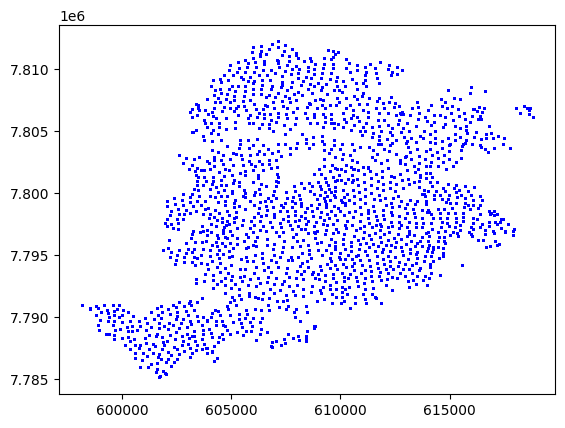

In [ ]:
# Masterdata
plt.scatter(new_final_df['coordx'],new_final_df['coordy'],c='blue',label='Old',s=1)

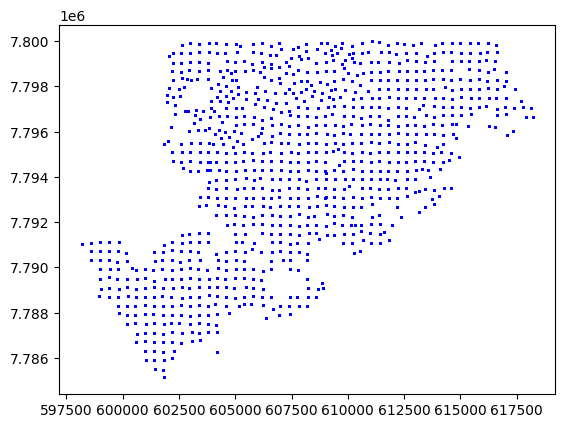

In [ ]:
filter_df = new_final_df[(new_final_df['coordx2'] > 500000) & (new_final_df['coordx2'] < 700000) & 
                     (new_final_df['coordy2'] > 500000) & (new_final_df['coordy2'] < 7800000)]
plt.scatter(filter_df['coordx2'],filter_df['coordy2'],c='blue',label='Old',s=1)


#### Tentantive to correct the coordinates

In [ ]:
# Check correlation between the two coordinate systems
print('Difference between coordinate system')
print('x:',(new_final_df['coordx'] - new_final_df['coordx2']).unique())
print('y:\n',(new_final_df['coordy'] - new_final_df['coordy2']).unique())

nan_traps_active_traps = df_operations.print_rows_with_nan(new_final_df, 'coordx2',True,False)


Difference between coordinate system
x: [ 375.2455 -167.623  -124.439  ... -211.369    49.952     6.57  ]
y:
 [-1263.12    205.116    54.017 ...  -156.301   -43.169    26.702]


In [ ]:
y_diff = (new_final_df['coordy'] - new_final_df['coordy2']).dropna()
#plt.hist(y_diff, bins=100,range=(-100,100))
y_diff.value_counts(sort=True).iloc[:100]


 0.012      886
-0.009      604
 0.026      602
 1.029      601
-0.028      601
           ... 
-241.007    308
-2.576      308
-136.988    308
 6.284      308
 37.034     308
Name: count, Length: 100, dtype: int64

In [ ]:
x_diff = (new_final_df['coordx'] - new_final_df['coordx2']).dropna()
#plt.hist(x_diff, bins=100,range=(-100,100))
x_diff.value_counts(sort=True).iloc[:100]


-0.012      887
 0.037      825
-0.036      604
 0.010      604
 1.022      599
           ... 
-42.576     307
 216.009    307
-96.957     307
 95.973     307
 66.763     307
Name: count, Length: 100, dtype: int64

In [40]:
nanx = df_operations.print_rows_with_nan(filter_df, 'coordx',True,False)
nany = df_operations.print_rows_with_nan(filter_df, 'coordy',True,False)

In [ ]:
#TODO
# Create a set to store unique pairs
unique_coordinates = set()

# Iterate over the DataFrame rows and add each pair as a tuple to the set
for row in new_final_df.itertuples(index=False):
    if np.isnan(row.coordx) or np.isnan(row.coordy):
        continue
    pair = (row.coordx, row.coordy)
    unique_coordinates.add(pair)

## Problems

# DRAFT

In [ ]:
new_final_df.isna().sum().sort_values(ascending=False)[:30]

coordy2          49316
coordx2          49316
longitude        49316
latitude         49316
CatRC             6508
nagovosdiacol     4988
coordx            3149
coordy            3149
cdbairro           794
quadra             552
qquadbh            552
scoreG              41
Peso1               41
Peso2               41
SumOvosP1           41
SumOvosP2           41
npesmes              0
npesanoepi           0
quadaa               0
npesano              0
quinzepid            0
distrito             0
Calustro             0
quadaadist           0
quinzena             0
quadist              0
qquaCatRC            0
aadist               0
qaadist              0
qaaCatRC             0
dtype: int64